# This program gives insights about the crime statistics of city of Denver. One can find out which districts have higher incidents of particular type of crime and also what times and what months are the most dangerous in terms of crime 

In [5]:
##Importing modules and reading the file 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from termcolor import colored, cprint
#import geopandas as gpd

crimes = pd.read_csv("A:/Business Analytics/Python/Class/crime.csv")


# Function for chekcing the district wise stats for a particular crime

In [6]:
#checking for theft cases
def theft():
    crime_incidents = crimes[crimes.OFFENSE_TYPE_ID.str.contains('theft',case=False)]
    crime_incidents_df = pd.DataFrame(crime_incidents)
   
    #Crime comparison of theft by districts 
    districts = crime_incidents.DISTRICT_ID.unique()
    districts = np.sort(districts)
    #storing the number of theft incident per district in variables
    district_wise_crime = np.zeros(7,dtype = int)
    
    
    #selecting disrtrict wise crime data
    crime_incidents_districts = np.array(crime_incidents_df.loc[:,["DISTRICT_ID"]])
    
    #collecting instances of that crime per district
    for i in range(0,len(crime_incidents_districts)):
        for j in range(0,len(districts)):
            district_number = j+1
            if(crime_incidents_districts[i] == district_number):
                district_wise_crime[j]+=1
    
  
    ##creating a bar graph for theft crime incidents 
    
    
    #creating the names of districts in y_pos to be used in graph 
    y_pos = []
    
    for i in range (1,(len(districts)+1)):
        area = "District "+str(i)
        y_pos = np.append(y_pos,area)
    
    slices_hours = district_wise_crime
    
    colors = ['r', 'g','b','y','c','m','lightcoral']
    plt.pie(slices_hours, labels=y_pos, colors=colors, startangle=90, autopct='%1.1f%%', shadow=True)
    plt.show()



# Function for finding the most dangerous time to be outside in a day 

In [7]:
def dangerous_time():
    ###Most Dangerous time to be outside ####
    
    #getting important type specific information regarding the crime
    crime_info = crimes.loc[:,["INCIDENT_ID","OFFENSE_TYPE_ID","FIRST_OCCURRENCE_DATE"]]
    #time information of various crimes stored in an array
    time = np.array(crime_info['FIRST_OCCURRENCE_DATE'])
     
     #creating time values for comparison with the time of crime
    timestamp_date = pd.to_datetime(time, infer_datetime_format=True)
    
    
    
    ##creating a time_range array to for comparing the time data
    time_range = np.array(datetime.strptime("00:00:00","%H:%M:%S").time())
    
    for i in range (1,24):
        x = str(i)+":00:00"
        y= datetime.strptime(x,"%H:%M:%S").time()
        time_range = np.append(time_range,y)
    
    #interval named array to store number of crime incidents in a time range

    intervals = np.zeros(24, dtype = int)
     
    
    #counting the interval when incident ouccured and storing them to the interval array
    for i in range(len(timestamp_date)):
        for j in range(1,len(time_range)):
            if(time_range[j-1] <=timestamp_date[i].time() < time_range[j] ):  
                #exclude the upper limit include the lower one
                intervals[j] = intervals[j]+1
    

    ##Plotting a bar graph for representing the incidents of crime as per time##
    
    #creating an array for graphical representation of time intervals
    y_pos = []

    y_pos = np.append(y_pos,"00:00-1:00")


    for i in range (1,24):
        date = str(i)+":00-"+str(i+1)+":00"
        y_pos = np.append(y_pos,date)
    
    
    plt.bar(y_pos,intervals, align='center', alpha= 0.5)
    
    plt.ylabel('Crime incidents ')
    plt.xlabel('Timings ')
    plt.xticks(rotation=75)
    
    plt.show()
    
    print("The most dangerous time to be out is between : ",y_pos[(intervals.argmax())],"hrs")
    
    

# Function for finding the most dangerous month in terms of crime 

In [8]:
def dangerous_month():
    
    ##the most dangerous month as for crimes##
    #getting important type specific information regarding the crime
    crime_info = crimes.loc[:,["INCIDENT_ID","OFFENSE_TYPE_ID","FIRST_OCCURRENCE_DATE"]]
    #crime_info_new = crime_info['Crime_Time']
    
    #time and date information of various crimes stored in an array
    time = np.array(crime_info['FIRST_OCCURRENCE_DATE'])
    
    timestamp_date = pd.to_datetime(time, infer_datetime_format=True)
    #creating an array to store the crime incidents for months##
    months = np.zeros(12, dtype = int )
    ##checking the month for each crime incident and updating the months array##
    for i in range(len(timestamp_date)):
        for j in range(1,len(months)+1):
            if(timestamp_date[i].month == j):
                months[j-1]+=1
                
    
    ##creating a bar graph for crime incidents as per months##
    y_pos = ["Jan","Feb","Mar","April","May","June","July","August","Sept","Oct","Nov","Dec"]
    #print(timestamp_date_rng[3].month() )

    plt.bar(y_pos,months, align='center', alpha= 0.5)

    plt.ylabel('Crime incidents ')
    plt.xlabel('Months ')
    plt.xticks(rotation=45)
    plt.show()
    print("The most dangerous month is : ",y_pos[(months.argmax())])
    #Turns out August is the most dangerous month, closely followed by July and September



# Main function to make the function call  

Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : 1
Option selected :1


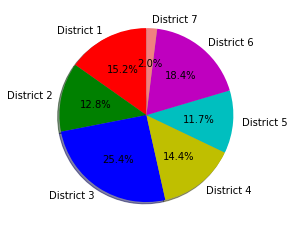

Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : 2
Option selected :2


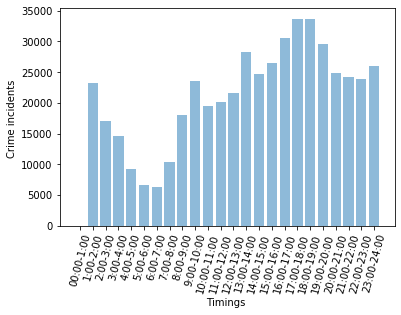

The most dangerous time to be out is between :  17:00-18:00 hrs
Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : 3
Option selected :3


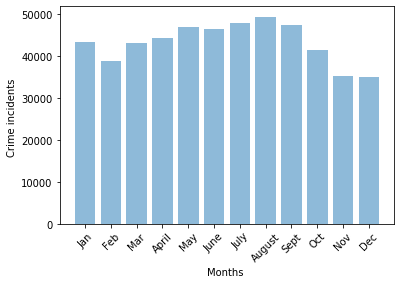

The most dangerous month is :  August
Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : yuyu
Option selected :yuyu
INVALID OPTION SELECTED !!!
Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : 0000
Option selected :0000
INVALID OPTION SELECTED !!!
Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : ggg
Option selected :ggg
INVALID OPTION SELECTED !!!
Option 1 : Districts as per cases of theft 
Option 2 : Most Dangerous time to be out 
Option 3 : Most dangerous month as per crime statistics 

Enter the option or write exit to exit : exit
Option selected :exit


In [9]:
inp = ""

while (inp != "exit"):
    print(
    "Option 1 : Districts as per cases of theft \n"
    "Option 2 : Most Dangerous time to be out \n"
    "Option 3 : Most dangerous month as per crime statistics \n"
    )
    inp = np.array(input("Enter the option or write exit to exit : "))
    print("Option selected :" + str(inp))
    allowed = ['1','2','3','exit']
    
    if(inp.__contains__(allowed)):
        if inp == "1":
            theft()
        if inp == "2":
            dangerous_time()
        if inp == "3":
            dangerous_month()
    
    if(not(inp.__contains__(allowed))):
        warn = colored("INVALID OPTION SELECTED !!!",attrs=['bold'])
        cprint(warn,'green','on_red')
        
        